## Dataset

O nosso dataset providencia-nos dados geográficos e contagem de casos confirmados, óbitos e recuperados do Covid-19 num periodo de  4 meses (22 de janeiro de 2020 a 5 de maio de 2020) em vários países. O objetivo será extrair informação dos dados de forma a podermos construir um modelo de regressão capaz de prever as contagens tendo por base os fatores disponiveis (localização geográfica, dia e contagem anterior). Assim sendo é necessário partir dos dados iniciais e proceder a um pré-processamento para tratar os dados e poder-se então utlizar os algoritmos de regressão que pretendemos utilizar.

### Variáveis independentes

Como foi supramencionado, pretendemos utilizar certos fatores para fundamentarmos a nossa previsão (partindo dos dados do dataset). Estes então serão as coordenadas geográficas (Latitude e Longitude), número de dias desde o inicio da previsão (ou seja, 22 de janeiro) e contagens anteriores (número de casos confirmados, óbitos e recuperados do dia anterior).

### Variáveis Dependentes

Os valores que vamos prever serão os números de casos confirmados, óbitos e recuperados, sendo então estas as nossas variáveis independentes.

## Tratamento de dados

Para podermos obter resultados fiáveis, é preciso haver um tratamento dos dados que vem do dataset.
Pegando dos dados processados anteriormente feito inicialmente, começamos por extrai-los do ficheiro para podermos manipulá-los.

In [1]:
import pandas as pd

covid_data = pd.read_csv('covid_19_clean_complete.csv')
covid_data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
27451,NaN,Western Sahara,24.215500,-12.885800,5/4/20,6,0,5
27452,NaN,Sao Tome and Principe,0.186360,6.613081,5/4/20,23,3,4
27453,NaN,Yemen,15.552727,48.516388,5/4/20,12,2,0
27454,NaN,Comoros,-11.645500,43.333300,5/4/20,3,0,0


De seguida, após uma análise, verificou-se a presença de entrada respeitantes a navios que nalgum momento tiveram casos de Covid-19 e não estão portanto associados a nenhum país particular.
Além disso, consideramos que estes dados iriam criar ruído, pelo que optamos por ignorá-los e remover dos dados em análise.

In [2]:
covid_data = covid_data.drop(covid_data[covid_data['Province/State']=='Grand Princess'].index)
covid_data = covid_data.drop(covid_data[covid_data['Province/State']=='Diamond Princess'].index)
covid_data = covid_data.drop(covid_data[covid_data['Country/Region']=='Diamond Princess'].index)
covid_data = covid_data.drop(covid_data[covid_data['Country/Region']=='MS Zaandam'].index)
covid_data = covid_data.reset_index()
del covid_data['index']
covid_data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
27035,NaN,Western Sahara,24.215500,-12.885800,5/4/20,6,0,5
27036,NaN,Sao Tome and Principe,0.186360,6.613081,5/4/20,23,3,4
27037,NaN,Yemen,15.552727,48.516388,5/4/20,12,2,0
27038,NaN,Comoros,-11.645500,43.333300,5/4/20,3,0,0


A maioria das entradas da coluna **Province/State** tem valores nulos, pelo que procedemos a eliminá-los. Além disso, como ter uma entrada para uma região e país não é muito relevante, optamos por agregar as duas informações numa só coluna denominada de **Local**.

In [3]:
import numpy as np

covid_data['Province/State'] = covid_data.replace(np.nan, '', regex=True)
cols = ['Province/State', 'Country/Region']
covid_data['Local'] = covid_data[cols].apply(lambda row: ' / '.join(row.values.astype(str)) if row.values[0] != '' else ''.join(row.values.astype(str)), axis=1)
del covid_data['Province/State']
del covid_data['Country/Region']
covid_data

,Lat,Long,Date,Confirmed,Deaths,Recovered,Local
0,33.000000,65.000000,1/22/20,0,0,0,Afghanistan
1,41.153300,20.168300,1/22/20,0,0,0,Albania
2,28.033900,1.659600,1/22/20,0,0,0,Algeria
3,42.506300,1.521800,1/22/20,0,0,0,Andorra
4,-11.202700,17.873900,1/22/20,0,0,0,Angola
...,...,...,...,...,...,...,...
27035,24.215500,-12.885800,5/4/20,6,0,5,Western Sahara
27036,0.186360,6.613081,5/4/20,23,3,4,Sao Tome and Principe
27037,15.552727,48.516388,5/4/20,12,2,0,Yemen
27038,-11.645500,43.333300,5/4/20,3,0,0,Comoros


De seguida, vamos converter as datas em contagem de dias desde o início do dataset (22 de janeiro de 2020)

In [4]:
covid_data['Date'] = pd.to_datetime(covid_data['Date'],format='%m/%d/%y')
covid_data['Date'] -= pd.to_datetime("2020-01-22")
covid_data['Date'] /= np.timedelta64(1,'D')
covid_data = covid_data.rename(columns  = {'Date':'Days Passed'})



Por fim, adicionar as colunas da contagem do dia anterior. Este passo é um pouco mais longo tendo em conta o numero de linhas e a procura pelo valor anterior.

In [5]:
covid_data['Conf. Prev.'] = covid_data.apply(lambda row: 
                                                      covid_data[(covid_data['Local'] == row['Local']) & (covid_data['Days Passed'] == row['Days Passed']-1)]['Confirmed'].item()
                                                      if row['Days Passed'] > 0 else 0,axis=1)
covid_data['Deaths Prev.'] = covid_data.apply(lambda row: 
                                                      covid_data[(covid_data['Local'] == row['Local']) & (covid_data['Days Passed'] == row['Days Passed']-1)]['Deaths'].item()
                                                      if row['Days Passed'] > 0 else 0,axis=1)
covid_data['Recov. Prev.'] = covid_data.apply(lambda row: 
                                                      covid_data[(covid_data['Local'] == row['Local']) & (covid_data['Days Passed'] == row['Days Passed']-1)]['Recovered'].item()
                                                      if row['Days Passed'] > 0 else 0,axis=1)

covid_data

,Lat,Long,Days Passed,Confirmed,Deaths,Recovered,Local,Conf. Prev.,Deaths Prev.,Recov. Prev.
0,33.000000,65.000000,0.0,0,0,0,Afghanistan,0,0,0
1,41.153300,20.168300,0.0,0,0,0,Albania,0,0,0
2,28.033900,1.659600,0.0,0,0,0,Algeria,0,0,0
3,42.506300,1.521800,0.0,0,0,0,Andorra,0,0,0
4,-11.202700,17.873900,0.0,0,0,0,Angola,0,0,0
...,...,...,...,...,...,...,...,...,...,...
27035,24.215500,-12.885800,103.0,6,0,5,Western Sahara,6,0,5
27036,0.186360,6.613081,103.0,23,3,4,Sao Tome and Principe,16,1,4
27037,15.552727,48.516388,103.0,12,2,0,Yemen,10,2,0
27038,-11.645500,43.333300,103.0,3,0,0,Comoros,3,0,0


In [6]:
with pd.ExcelWriter('covid_19_distance.xlsx') as writer:
    covid_data.to_excel(writer)

## Linear Regression

Um dos algoritmos que decidimos usar foi o de regressão linear, devido à sua simplicidade. É de esperar que os resultados gerados não sejam muito bons, pelo que será usado como base de comparação com os outros algoritmos.

Fórmula de regressão linear:

[predicted_confirmed,predicted_deaths,predicted_recovered] = M * [lat,long,days_passed,confirmed_previous_day,deaths_previous_day,recovered_previous_day] + B

M é a matriz coeficiente

B é a matriz residual

In [7]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
reg = linear_model.LinearRegression()

#colunas em que vamos basear as previsões
x_columns = ['Lat','Long','Days Passed', 'Conf. Prev.', 'Deaths Prev.', 'Recov. Prev.']
#colunas que queremos prever
y_columns = ['Confirmed','Deaths','Recovered']

X_train, X_test, y_train, y_test = train_test_split(covid_data[x_columns], covid_data[y_columns], test_size=0.0096)
unscaled_test = X_test.join(y_test)

reg.fit(X_train,y_train)

LinearRegression()

In [8]:
#Matriz coeficiente
print(reg.coef_)
#Matriz residual
print(reg.intercept_)

[[ 0.95107457 -0.25035653  1.0187174   1.05764102 -0.22506923 -0.05950847]
 [ 0.0741526  -0.01663223  0.05373587  0.00221345  1.01308118 -0.00375111]
 [ 0.08186828 -0.04267151  0.17336451  0.00915769 -0.04029317  1.01749643]]
[-19.82715633  -1.21440124  -2.44179509]


In [9]:
#geração das previsões
predictions = reg.predict(X_test)

y_pred = predictions

#tratar dos resultados
predictions = pd.DataFrame(data=predictions,columns=['Confirmed Prediction','Deaths Prediction','Recovered Prediction'])

#buscar os locais para apresentar as previsoes, ja que nao foram usados no modelo de regressão
predictions['Local'] = unscaled_test.apply(lambda row: covid_data.loc[(covid_data['Lat'] == row['Lat']) & (covid_data['Long'] == row['Long']),'Local'].iloc[0],axis=1).tolist()

#arredondar os valores para inteiros, com teto
predictions['Confirmed Prediction'] = predictions['Confirmed Prediction'].apply(np.ceil)
predictions['Deaths Prediction'] = predictions['Deaths Prediction'].apply(np.ceil)
predictions['Recovered Prediction'] = predictions['Recovered Prediction'].apply(np.ceil)

#comparar os valores previstos e reais guardar a diferença nas contagens
predictions['Confirmed Actual'] = unscaled_test['Confirmed'].tolist()
predictions['Deaths Actual'] = unscaled_test['Deaths'].tolist()
predictions['Recovered Actual'] = unscaled_test['Recovered'].tolist()
#colocar o numero de dias passados para ser mais facil analisar
predictions['Days Passed'] = unscaled_test['Days Passed'].tolist()

predictions = predictions[['Days Passed','Local', 'Confirmed Prediction', 'Confirmed Actual','Deaths Prediction', 'Deaths Actual','Recovered Prediction','Recovered Actual']]
predictions

In [24]:
from sklearn.metrics import *

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)

print("Mean Squared Error: {}\nMean Absolute Error: {}\nR²: {}".format(mse,mae,r2))

Mean Squared Error: 126825.25
Mean Absolute Error: 66.89102564102564
R²: 0.9981830197880756


In [12]:
results = {"data": predictions,"mse" : mse, "mae": mae,"r2":r2}
total_results = results['data']

for i in range(1,len(results)):
    total_results = total_results.append(results['data'],ignore_index=True)
del total_results['Days Passed']
del total_results['Local']
total_results

conf_pred = total_results['Confirmed Prediction']
conf_actual = total_results['Confirmed Actual']
deaths_pred = total_results['Deaths Prediction']
deaths_actual = total_results['Deaths Actual']
recovered_pred = total_results['Recovered Prediction']
recovered_actual = total_results['Recovered Actual']

total_results

,Confirmed Prediction,Confirmed Actual,Deaths Prediction,Deaths Actual,Recovered Prediction,Recovered Actual
0,7041.0,6890,145.0,130,957.0,977
1,-3.0,13,-0.0,0,-1.0,1
2,19.0,0,2.0,0,1.0,0
3,-95.0,0,-6.0,0,-12.0,0
4,-10.0,0,-1.0,0,1.0,0
...,...,...,...,...,...,...
1035,-64.0,5,-4.0,0,-8.0,0
1036,6761.0,6674,231.0,232,447.0,439
1037,136.0,144,3.0,3,19.0,20
1038,62.0,16,4.0,2,10.0,0


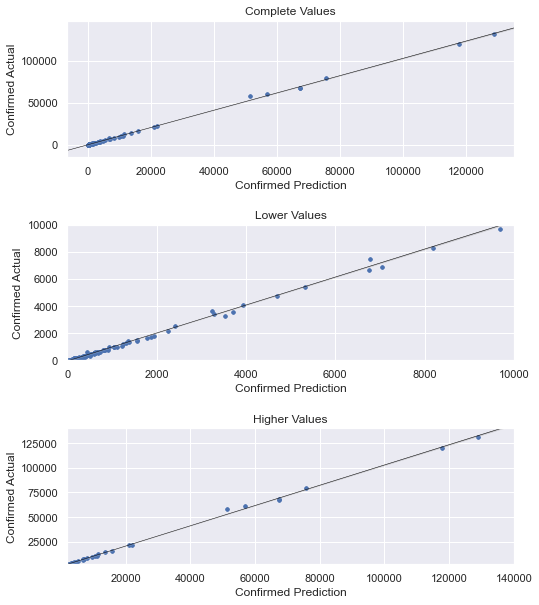

In [23]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set(color_codes=True)
fig,axs = plt.subplots(nrows=3,figsize=(8,10))
axs[0].set_title('Complete Values')
axs[1].set_title('Lower Values')
axs[1].set_xlim(0,10000)
axs[1].set_ylim(0,10000)
axs[2].set_title('Higher Values')
axs[2].set_xlim(2000,140000)
axs[2].set_ylim(2000,140000)
plt.subplots_adjust(hspace=0.5)
sb.regplot(x=conf_pred, y=conf_actual, data=total_results, marker='.',color='b',ax=axs[0], line_kws={"lw": 0.5, "color": "black"},truncate=False)
sb.regplot(x=conf_pred, y=conf_actual, data=total_results, marker='.',color='b',ax=axs[1],line_kws={"lw": 0.5, "color": "black"},truncate=False)
sb.regplot(x=conf_pred, y=conf_actual, data=total_results, marker='.',color='b',ax=axs[2],line_kws={"lw": 0.5, "color": "black"},truncate=False)

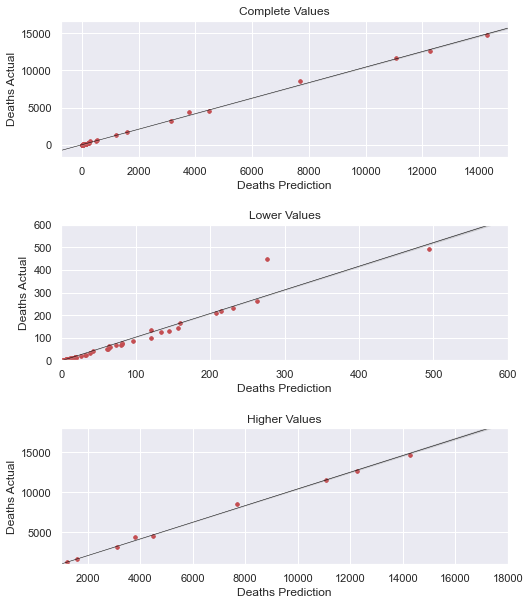

In [18]:
fig,axs = plt.subplots(nrows=3,figsize=(8,10))
axs[0].set_title('Complete Values')
axs[1].set_title('Lower Values')
axs[1].set_xlim(0,600)
axs[1].set_ylim(0,600)
axs[2].set_title('Higher Values')
axs[2].set_xlim(1000,18000)
axs[2].set_ylim(1000,18000)
plt.subplots_adjust(hspace=0.5)
sb.regplot(x=deaths_pred, y=deaths_actual, data=total_results, marker='.',color='r',ax=axs[0], line_kws={"lw": 0.5, "color": "black"},truncate=False)
sb.regplot(x=deaths_pred, y=deaths_actual, data=total_results, marker='.',color='r',ax=axs[1],line_kws={"lw": 0.5, "color": "black"},truncate=False)
sb.regplot(x=deaths_pred, y=deaths_actual, data=total_results, marker='.',color='r',ax=axs[2],line_kws={"lw": 0.5, "color": "black"},truncate=False)

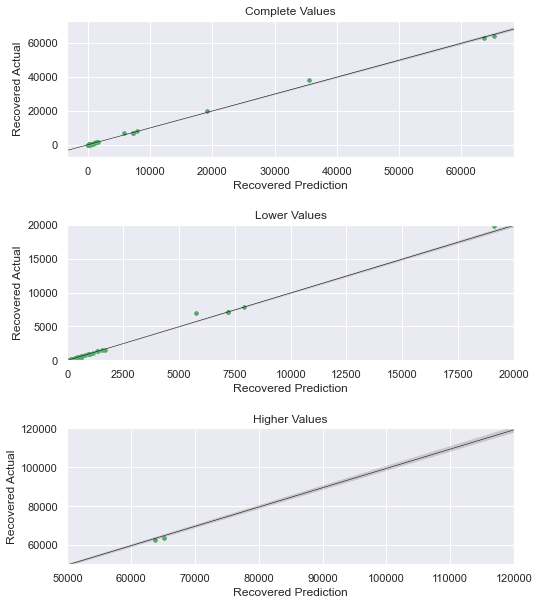

In [15]:
fig,axs = plt.subplots(nrows=3,figsize=(8,10))
axs[0].set_title('Complete Values')
axs[1].set_title('Lower Values')
axs[1].set_xlim(0,20000)
axs[1].set_ylim(0,20000)
axs[2].set_title('Higher Values')
axs[2].set_xlim(50000,120000)
axs[2].set_ylim(50000,120000)
plt.subplots_adjust(hspace=0.5)
sb.regplot(x=recovered_pred, y=recovered_actual, data=total_results, marker='.',color='g',ax=axs[0], line_kws={"lw": 0.5, "color": "black"},truncate=False)
sb.regplot(x=recovered_pred, y=recovered_actual, data=total_results, marker='.',color='g',ax=axs[1],line_kws={"lw": 0.5, "color": "black"},truncate=False)
sb.regplot(x=recovered_pred, y=recovered_actual, data=total_results, marker='.',color='g',ax=axs[2],line_kws={"lw": 0.5, "color": "black"},truncate=False)

In [16]:
with pd.ExcelWriter('covid_19_linear_predictions.xlsx') as writer:
    predictions.to_excel(writer)